In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight

/Users/mac/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
data_path = '../Dataset/data.csv'
data = pd.read_csv(data_path)

In [4]:
data

,label,data
0,anger,"sok geura leungit atuh sia teh corona, matak g..."
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna"
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ..."
...,...,...
2093,joy,Meuni ngeunah ngabarakatak eeeuy uiiiiing....!
2094,joy,"Meuni ku endah, tebeda nami na gusti nu agung,..."
2095,joy,"meuni bungah kieu euy meunang di ngalam, nuhun..."
2096,joy,"Meuni bingah ningalna ya alloh mudah"" PaS 02 k..."


In [5]:
data_snippet = data['data']
data_snippet[3]

'asa hariwang kieu.. lalakon hirup teh asa nyorangan.. asa ieu mah..'

In [6]:
data.loc[3]

label                                                 fear
data     asa hariwang kieu.. lalakon hirup teh asa nyor...
Name: 3, dtype: object

In [7]:
texts = data['data'].astype(str).tolist()
labels = data['label'].tolist()


In [8]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
encoded_labels = np.array(label_tokenizer.texts_to_sequences(labels)) - 1
encoded_labels = to_categorical(encoded_labels)

In [9]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = max(len(x) for x in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
stopwords = pd.read_csv('../Dataset/stopwordv1.txt', header=None)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train.argmax(axis=1)), y=y_train.argmax(axis=1))
class_weight_dict = dict(enumerate(class_weights))


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    Dense(len(label_tokenizer.word_index), activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()


/Users/mac/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, class_weight=class_weight_dict)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3135 - loss: 1.3761 - val_accuracy: 0.5655 - val_loss: 1.2468
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6700 - loss: 1.0849 - val_accuracy: 0.8036 - val_loss: 0.7075
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8832 - loss: 0.4578 - val_accuracy: 0.8750 - val_loss: 0.4766
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9608 - loss: 0.1982 - val_accuracy: 0.9107 - val_loss: 0.3160
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9822 - loss: 0.1047 - val_accuracy: 0.8929 - val_loss: 0.3666
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9796 - loss: 0.1142 - val_accuracy: 0.9107 - val_loss: 0.3282
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9911 - loss: 0.0533 - val_accuracy: 0.9226 - val_loss: 0.2687
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9985 - loss: 0.0215 - val_accuracy: 0.9405 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Accuracy: 0.92


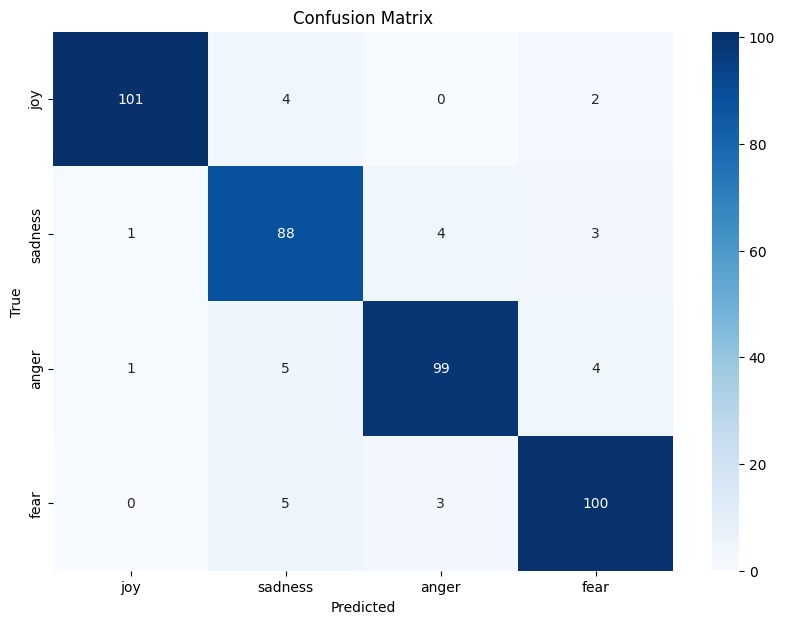

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_tokenizer.word_index, yticklabels=label_tokenizer.word_index)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
new_text = """
si kabayan teh kandulan pisan. ari kandulan teh jahe=jago he-es (beuki sare), teu kaop 
nyangkere atawa nyarande sok ker wae kerek. 
 
sakali mangsa si kabayan teh di cukur. di cukurna handapeun tangkal gede disisi jalan 
supratman. ari tukang cukur teh ruruntuk dalang, tadina hayang jadi dalang tapi teu 
kataekan, kalah jadi tukang cukur. teu wudu payu nyukurna teh da eta ari nyukur sok bari 
ngadalang. 
 
si kabayan ti barang gek diuk dina korsi panyukuran geus lelenggutan wae nundutan. saperti 
biasa tukang cukur teh ari ceg kana gunting jeung sisir tuluy wae ngabuih… ngadalang, pok 
na teh…. “tah kacatur keun di nagara alengka, rajana jenengan Dasamuka…. ari dasa hartina 
sapuluh… ari muka eta hartosna beungeut atanapi raray… “. si kabayan nu keur ngalenggut 
ngarasa ka ganggu ku nu keur ngadalang, bari heuay si kabayan nyarita “pondokeun wae 
mang…”  trek-trek tukang cukur teh ngaguntingan buuk si kabayan bari pok deui… ” ari geus 
kitu… eta Dasamuka teh bogoh ka dewi Sinta, geureuhna sri Rama… ” “pondokeun wae 
mang…”ceuk si kabayan nyaritana selang seling antara inget jeung heunteu bakating ku 
tunduh, teu lila reup deui sare….. lilir sakeudeung, tukang cukur teh keur ngadongeng 
keneh, ..” urang tunda dewi Sinta nu keur di Alengka, sabab di paling ku Rahwana…. 
caturkeun sri Rama….” si kabayan asa ka ganggu sarena terus nyarita bari lulungu 
“pondokeun mang….”….terus reup deui peureum. trek..trek tukang cukur ngaguntingan 
buuk si kabayan bari nuluykeun ngadongengna. ari tiap si kabayan lilir, tukang cukur teh 
keur ngabuih keneh wae ngadalang, tapi ari leungeunna mah tetep teu eureun-eureun 
ngaguntingan buuk si kabayan. si kabayan keuheuleun pisan sabab sarena kaganggu ku sora 
tukang cukur, nu sakapeung sok ngagerem nurutan sora buta atawa ngajerit nurutan sora 
dewi sinta basa di paling ku Rahwana… antukna si kabayan ngambek ka tukang cukur bari 
nyarita ” ceuk aing ge pondokeun…pondokeun…” tukang cukur nembalan “dipondokeun 
kumaha ieu geus lenang kieu..” ari ret si kabayan kana eunteung enya wae sirahna geus 
gundul teu sa lembar-lembar acan, puguh wae si kabayan teh ambek “nu dipondokeun teh 
dongeng maneh lain lain buuk aing…” si kabayan morongos, tukang cukur nembalan bari 
nyentak “bongan sorangan, naha atuh sare wae batur di gawe teh, lain nuhun di embohan 
ku dongeng teh…” ngan hing wae si kabayan teh ceurik bakating ku handeueuleun jaba ari 
balik ku barudak di poyokan bari di abring-abring “…penjol….penjol….” 
""".strip()




In [ ]:
new_text

'si kabayan teh kandulan pisan. ari kandulan teh jahe=jago he-es (beuki sare), teu kaop \nnyangkere atawa nyarande sok ker wae kerek. \n \nsakali mangsa si kabayan teh di cukur. di cukurna handapeun tangkal gede disisi jalan \nsupratman. ari tukang cukur teh ruruntuk dalang, tadina hayang jadi dalang tapi teu \nkataekan, kalah jadi tukang cukur. teu wudu payu nyukurna teh da eta ari nyukur sok bari \nngadalang. \n \nsi kabayan ti barang gek diuk dina korsi panyukuran geus lelenggutan wae nundutan. saperti \nbiasa tukang cukur teh ari ceg kana gunting jeung sisir tuluy wae ngabuih… ngadalang, pok \nna teh…. “tah kacatur keun di nagara alengka, rajana jenengan Dasamuka…. ari dasa hartina \nsapuluh… ari muka eta hartosna beungeut atanapi raray… “. si kabayan nu keur ngalenggut \nngarasa ka ganggu ku nu keur ngadalang, bari heuay si kabayan nyarita “pondokeun wae \nmang…”  trek-trek tukang cukur teh ngaguntingan buuk si kabayan bari pok deui… ” ari geus \nkitu… eta Dasamuka teh bogoh ka de

In [ ]:
another_text = """
Si Kabayan dititah ngala nangka ku mitohana. “Nu kolot ngala nangka téh, Kabayan!” Ceuk mitohana. Kencling Si Kabayan ka kebon, nyorén bedog rék ngala nangka. Barang nepi ka kebon, Si Kabayan alak-ilik kana tangkal nangka. Manggih nu geus kolot hiji tur gedé pisan. Tuluy waé diala. Barang dipanggul kacida beuratna.

“Wah, moal kaduga yeuh mawana, “ pikir Si Kabayan téh. Tuluy wé nangka téh ku Si Kabayan dipalidkeun ka walungan. Jung waé balik ti heula, da geus kolot ieuh!” ceuk Si Kabayan téh nyarita ka nangka.

Barang tepi ka imah, Si Kabayan ditanya ku mitohana.

“Kabayan, meunang ngala nangka téh?”

“Komo wé meunang mah, nya gedé nya kolot,” témbal Si Kabayan.
“Mana atuh ayeuna nangkana?” Mitohana nanya.

“Har, naha can datang kitu? Apan tadi téh dipalidkeun dititah balik ti heula, ceuk Si Kabayan téh.

“Ari manéh, na mana bodo-bodo teuing. Moal enya nangka bisa balik sorangan!” Mitoha Si Kabayan keuheuleun pisan.

“Wah nu bodo mah nangkana, kolot-kolot teu nyaho jalan balik,” ceuk Si Kabayan bari ngaléos.
""".strip()

In [ ]:
new_sequences = tokenizer.texts_to_sequences([new_text])
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_length, padding='post')

In [ ]:
emotion_prediction = model.predict(new_padded_sequences)
predicted_emotion = label_tokenizer.index_word[np.argmax(emotion_prediction) + 1]
print("Emosi: ", predicted_emotion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Emosi:  anger


In [ ]:
additional_text = """
Wah, hate mah asa mekar, seuri teu eureun-eureun! Ngan ukur ngadéngé béja ieu geus ngajadikeun poé ieu pangsaéna.
"""


In [ ]:
additional_sequences = tokenizer.texts_to_sequences([additional_text])
additional_padded_sequences = pad_sequences(additional_sequences, maxlen=max_length, padding='post')


In [ ]:
additional_emotion_prediction = model.predict(additional_padded_sequences)
additional_predicted_emotion = label_tokenizer.index_word[np.argmax(additional_emotion_prediction) + 1]
print("Emosi: ", additional_predicted_emotion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Emosi:  joy


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

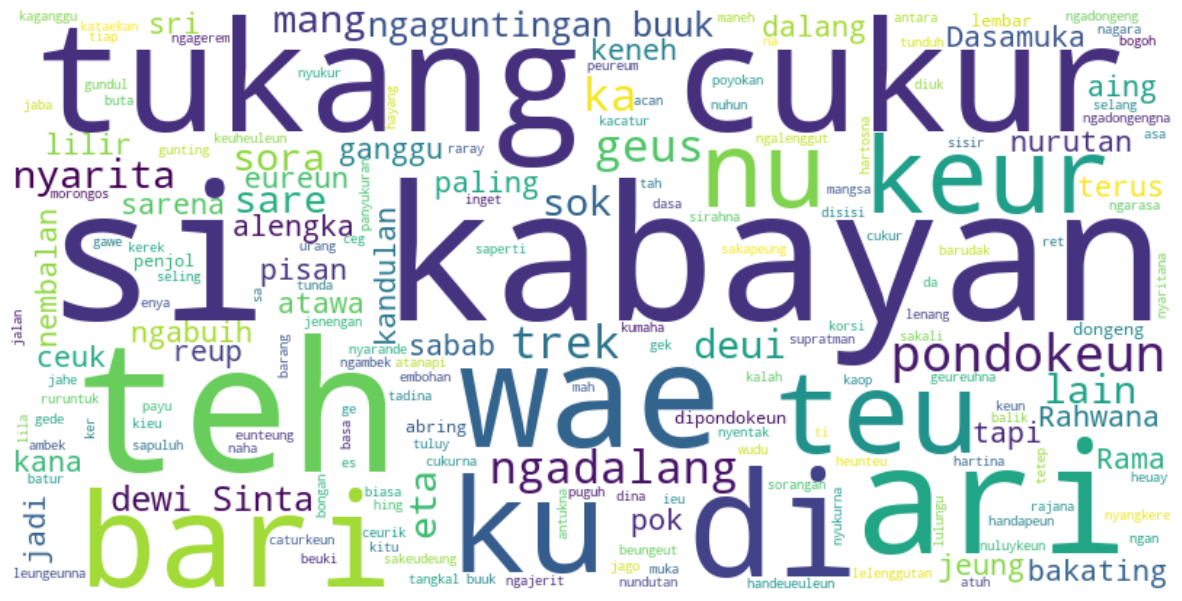

In [ ]:
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(new_text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text = " ".join(review for review in data['data'])

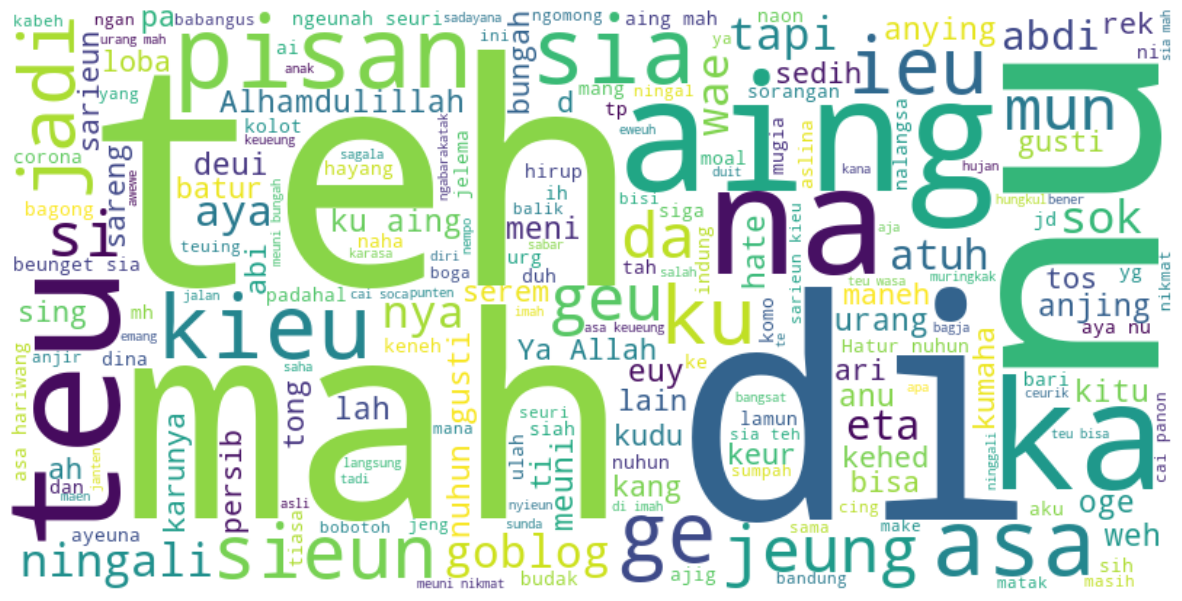

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data_test_path = '../Dataset/test.csv'

In [ ]:
data_test = pd.read_csv(data_test_path)

In [ ]:
data_test

,label,data
0,fear,meuni asa rame nya crime dimamana... kemarin j...
1,joy,Merinding ningali mic check rrq. Pernah ngasaa...
2,sadness,"mentang2 mamah ges dulur sabelah, meuni te dia..."
3,fear,meni serem atuh pas buka grup keluarga isinya ...
4,sadness,"Meni sedih udah mah ga boleh keluar, di dalem ..."
...,...,...
407,fear,Abi gawe di rs boromeus sararoak kieu:(
408,joy,Abdi teu ngartos tapi abdi seserian ningali si...
409,joy,Aaaaawww meuni bungah kieu aduh
410,joy,"Aa kasep hatur nuhun, eneng bingah pisan ningg..."


In [ ]:
data_test_snippet = data_test['data']

In [ ]:
data_test_snippet[4]

'Meni sedih udah mah ga boleh keluar, di dalem main game diamuk, serba salah :('

In [ ]:
data_test.loc[4]

label                                              sadness
data     Meni sedih udah mah ga boleh keluar, di dalem ...
Name: 4, dtype: object

In [ ]:
test_text = """
'Meni sedih udah mah ga boleh keluar, di dalem main game diamuk, serba salah :( '
""".strip()

In [ ]:
test_sqeuences = tokenizer.texts_to_sequences([test_text])
test_padded_sequences = pad_sequences(test_sqeuences, maxlen=max_length, padding='post')

In [ ]:
test_emotion_prediction = model.predict(test_padded_sequences)
test_predicted_emotion = label_tokenizer.index_word[np.argmax(test_emotion_prediction) + 1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
print("Emosi: ", test_predicted_emotion)

Emosi:  sadness


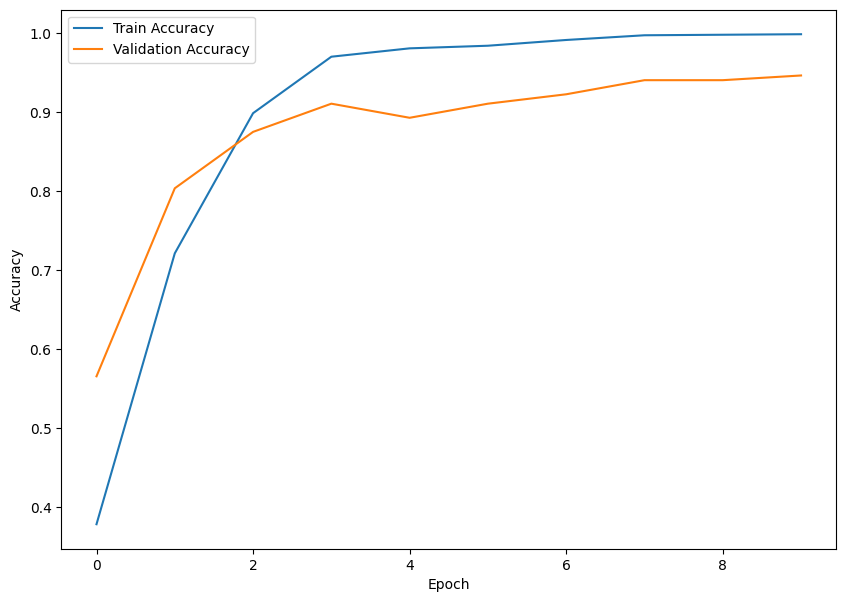

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

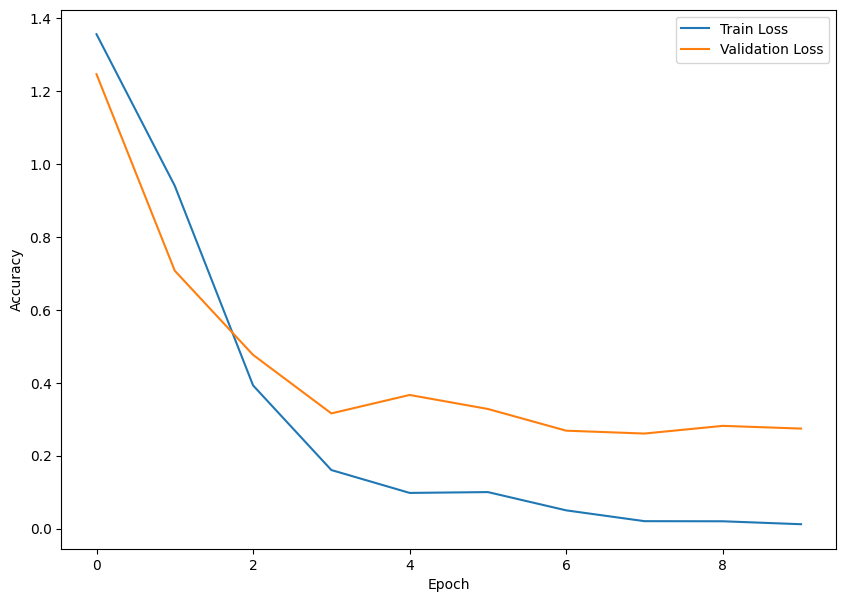

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model_path = 'model.h5'
model.save(model_path)

In [ ]:
import pickle

tokenizer_path = 'tokenizer.pkl'
with open(tokenizer_path, 'wb') as f:
    pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
def load_model_and_tokenizer(model_path, tokenizer_path):
    model = load_model(model_path)
    with open(tokenizer_path, 'rb') as f:
        tokenizer = pickle.load(f)
    return model, tokenizer

model, tokenizer = load_model_and_tokenizer(model_path, tokenizer_path)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def predicted_emotion(text, tokenizer, model, emotion_label, max_length=100):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=max_length)
    predictions = model.predict(padded_seq)[0]
    top_indices = np.argsort(predictions)[-3:][::-1]
    top_emotions = [(emotion_label[idx], predictions[idx]) for idx in top_indices]
    return top_emotions

In [ ]:
emotion_label_test = data_test['label'].unique()

In [ ]:
emotion_label_test

array(['fear', 'joy', 'sadness', 'anger'], dtype=object)

In [ ]:
testing = """
Wah, hate mah asa mekar, seuri teu eureun-eureun! Ngan ukur ngadéngé béja ieu geus ngajadikeun poé ieu pangsaéna.
""".strip()

In [ ]:
predicted_emotion(testing, tokenizer, model, emotion_label_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


[('joy', np.float32(0.5074256)),
 ('sadness', np.float32(0.334474)),
 ('anger', np.float32(0.08428739))]